# Outline:
## I.Theory
* ### I.0 Approaches before YOLO???
* ### I.1 What is YOLOv1???
* ### I.2 YOLO vs Haar-Like???
* ### I.3 YOLOv2???
* ### I.4 YOLOv3???
* ### I.5 Cons of a YOLO:

## II.Questions to ask Son

# I.Theory
Ref:
* 1.https://pjreddie.com/media/files/papers/yolo.pdf
* 2.https://towardsdatascience.com/yolo-you-only-look-once-real-time-object-detection-explained-492dc9230006
* 3.https://towardsdatascience.com/yolov1-you-only-look-once-object-detection-e1f3ffec8a89
* 4.https://towardsdatascience.com/review-yolov2-yolo9000-you-only-look-once-object-detection-7883d2b02a65
* 5.https://arxiv.org/pdf/1612.08242.pdf
* 6.https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b

## I.0 Approaches before YOLO???

- Object detection by Detecting Edge, Line, etc. using the difference between sums of the pixel intensities in each region (Haar-Like methods)
- Object detection repurposes classifiers to per-form detection Ex: (DPM, R-CNN, etc.)
[1]


## I.1 What is YOLOv1???

**High level ideas**
-  Frame object detection as a re-gression problem to spatially separated bounding boxes and associated class probabilities [1]. 
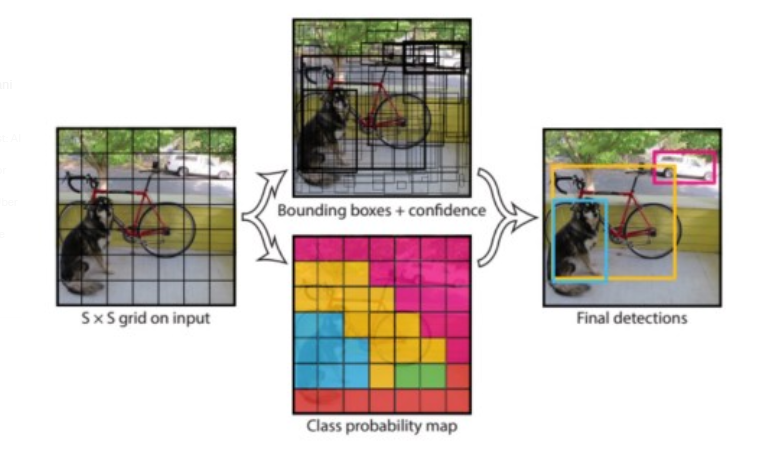
[2]
    + Center of an object falls into a grid cell, that grid cell is responsible for detecting that object ---> Each grid cell predicts B bounding boxes(BB) + confidencescores for those boxes (Note: size of BB >= size of the grid)
    Each bounding box consists of 5 predictions: x, y, w, h, and confidence (confidence=Pr(Object)∗IOU)
    ==> These  predictions  are  encoded  as  an S×S×(B∗5 +C)tensor [1]
   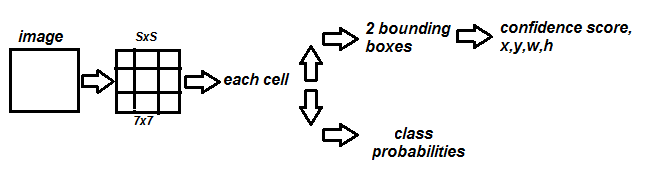
    
    
        
(IOU explanation:
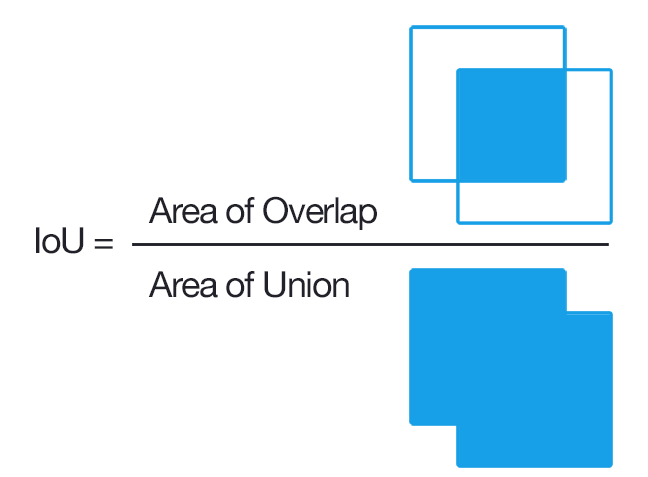
        
+ Unify  the  separate  components  of  object  detectioninto  a  single  neural  network ===> Unified Detection or why it is called You Only Look Once

**Training**
**Network Architecture**
-  24 convolutional layers followed by 2 fully connected layers. Alternating 1×1convolutional layers reduce the features space from preceding layers. Pretrain the convolutional layers on the ImageNet classificationtask at half the resolution (224×224input image) and then double the resolution for detection.
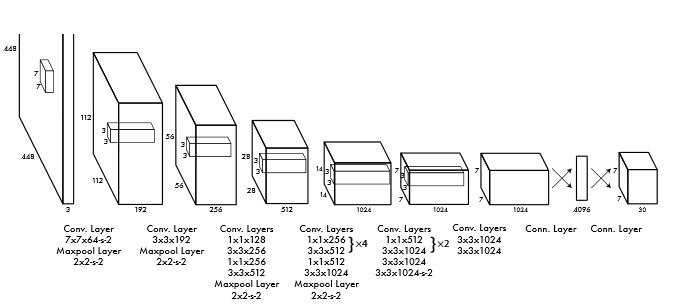

- Use a linear activation function for the final layer andall other layers use the following leaky rectified linear activation:
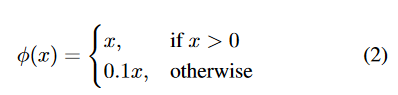
- Differential weight for confidence predictions from boxes that contain object and boxes that dont contain object during training.
- Predict the square root of the bounding box width and height to penalize error in small object and large object differently.
- YOLO predicts multiple bounding boxes per grid cell. At training time only want one bounding box predictor to be responsible for each object. Assign one predictor to be “responsible” for predicting an object based on which prediction has the highest current IOU with the ground truth. This leads to specialization between the bounding box predictors. Each predictor gets better at predicting certain sizes, aspect ratios, or classes of object, improving overall recall.

**Loss function**
- Increase the loss from bounding box coordinate  predictions  and  decrease  the  loss  from  confi-dence predictions for boxes that don’t contain objects. 
- Use two parameters, λcoord and λnoobj to accomplish this. Set λcoord= 5 and λnoobj=.5
- Use  multi-partloss function:
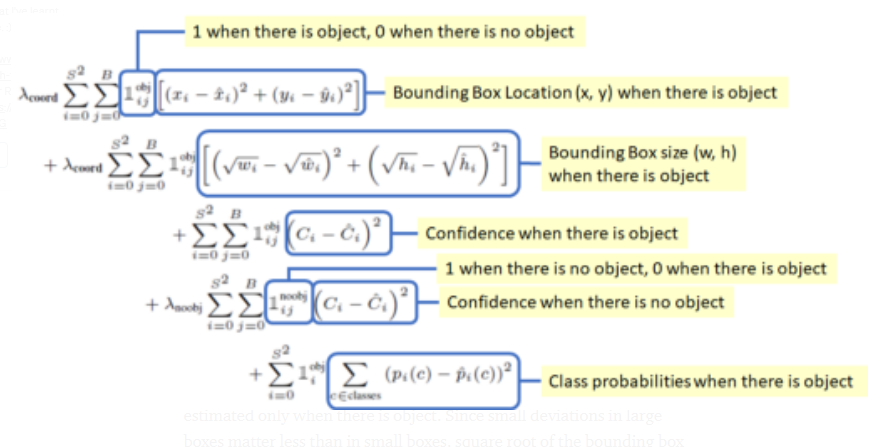
[3]

===>
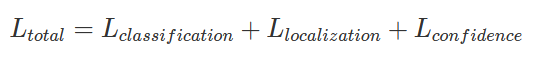

## I.2 YOLO vs Haar-Like:

- Haar-Like: Detect objects by Detecting Edge, Line, etc. using the difference between sums of the pixel intensities in each region
- YOLO: Object detection as a re-gression problem to spatially separated bounding boxes and associated class probabilities

## I.3 YOLOv2

**Updating vs YOLOv1**
- Batch normalization: By adding batch normalization on all convolutional layers in YOLO
- High Resolution Classifier: After trained by 224×224 images, 
    YOLOv2 also uses 448×448 images for fine-tuning the classification network for 10 epochs on ImageNet
- Convolutions with Anchor Boxes: removes all fully connected layers and uses anchor boxes to predict bounding boxes.
- Dimension Clusters: Instead of hand picking the prior boxes dimensions, select the finest priors by running K-means clustering algorithm on the training set to find the top K prevalent bounding boxes
-  Direct Location Prediction: bounds the location using logistic activation σ, which makes the value fall between 0 to 1
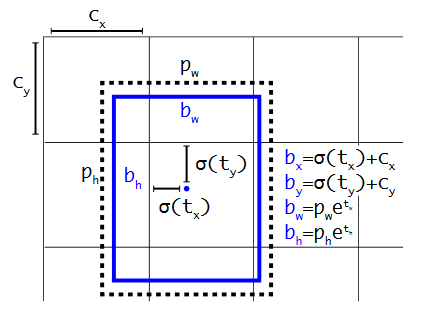
- Fine-Grained Features
- Multi-Scale Training: during training for every 10 batches, the network randomly chooses a new image size, since the model downsamples by a factor of 32, the chosen sizes should be a multiple of 32.
- YOLOv2 Using Darknet-19 (Faster)


## I.4 YOLOv3

**Updating vs YOLOv2**
- Use Darknet-53 106 layer fully convolutional underlying architecture for YOLO v3
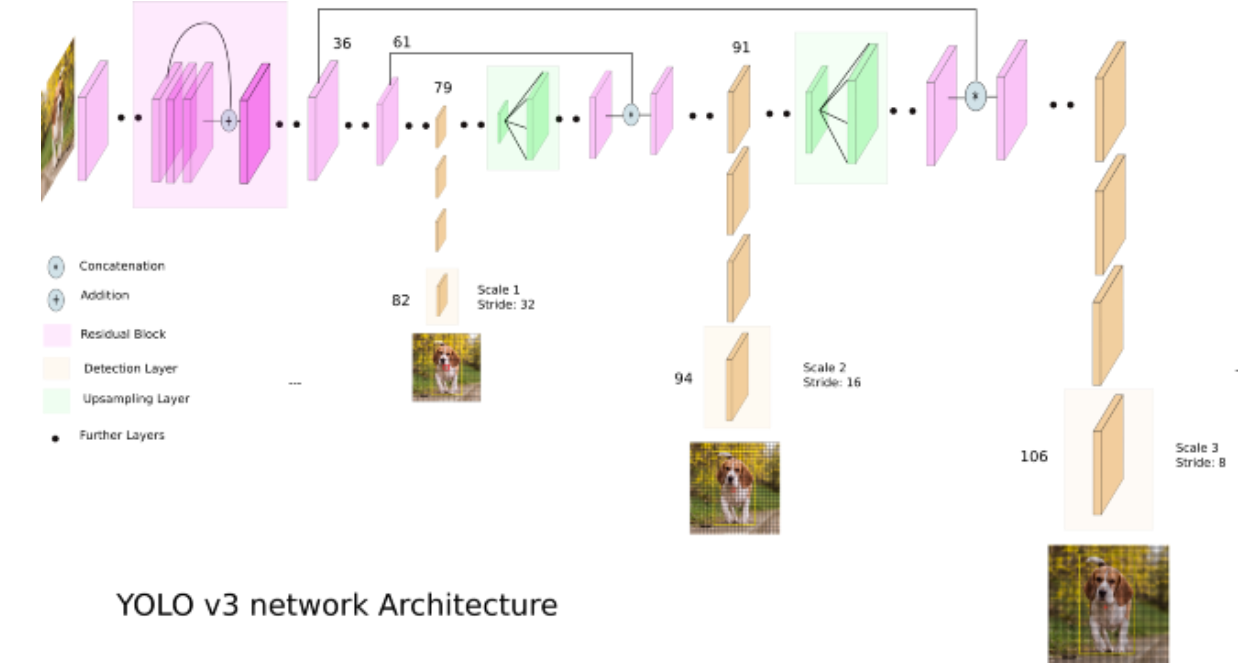

- Detection at three Scales: makes prediction at three scales, which are precisely given by downsampling the dimensions of the input image by 32, 16 and 8 respectively.
- Feature Pyramid Networks(FPN)The 13 x 13 layer is responsible for detecting large objects, whereas the 52 x 52 layer detects the smaller objects, with the 26 x 26 layer detecting medium objects
- More bounding boxes per image: YOLO v3 predicts 10x the number of boxes predicted by YOLO v2
- Class Predictions: use logistic classifiers instead of softmax for all class

## I.5 Cons of YOLO:

- Struggles to detect close objects.
- Struggles to detect small objects.

# II.Questions to ask Son

* **1. In YOLOv1 paper, mentioned "YOLO learns very general representations of objects", Ref [1]. Why YOLO learns very general representations of objects???** *
* **2. One of Updates of YOLOv2 is Batch Normalization. Why Accuracy Increases when adding Batch Normalization on all convolutional layers in YOLOv1???** *
* **3. Do you have any links to understand "Detection at three Scales" in YOLOv3???** *